CHAPTER 5. PANDAS
==============

Pandas는 데이터 분석을 위해서 기본적으로 필요한 자료구조, 데이터 분석 도구를 제공하는 파이썬 라이브러리이다. 

엑셀과 유사하게 row와 column으로 이뤄진 데이터 객체를 만들 수 있도록 해준다.

* 자동적으로 혹은 명시적으로 축의 이름에 따라 데이터를 정렬할 수 있는 자료구조
* 통합된 시계열 기능
* 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 통합 자료구조
* 누락된 데이터를 유연하게 처리할 수 있는 기능
* SQL과 같은 일반 데이터베이스처럼 데이터를 합치고 관계연산을 수행하는 기능
* 산술연산과 한 축의 모든 값을 더하는 등의 데이터 축약연산

### Import convention of Pandas

In [ ]:
from pandas import Series, DataFrame

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import pandas ##### 1
print(pandas.Series) #꼭 로컬 스페이스로 직접 임포트하지 않아도 된다.

5.1 Pandas 자료 구조
---------------------

### Series

#### - 1차원 배열과 같은 자료 구조

#### - 리스트와 딕셔너리 두 가지의 장점을 섞어 놓은 듯한 자료 구조

In [ ]:
bitamin = Series([92600, 92400, 92100, 94300, 92300]) ####2
print(bitamin)

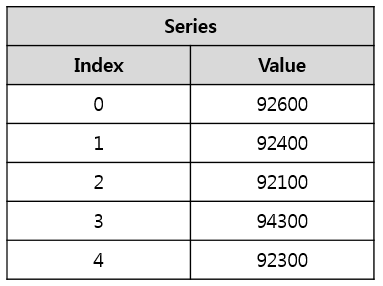

In [ ]:
bitamin.values

In [ ]:
bitamin.index

In [ ]:
bitamin2 = Series([92600, 92400, 92100, 94300, 92300], index=['2018-05-19',
                                                            '2018-05-18',
                                                            '2018-05-17',
                                                            '2018-05-16',
                                                            '2018-05-15'])
print(bitamin2) ####3

In [ ]:
print(bitamin2[1]) 

In [ ]:
print(bitamin2['2018-05-18'])

In [ ]:
for date in bitamin2.index:
    print(date)

for ending_price in bitamin2.values:
    print(ending_price) ####4

#### - 불리언 배열, 산술 곱셈, 수학 함수를 통해도 index값과 value값 연결은 유지된다.

In [ ]:
mine   = Series([10, 20, 30], index=['naver', 'sk', 'kt'])
friend = Series([10, 30, 20], index=['kt', 'naver', 'sk'])

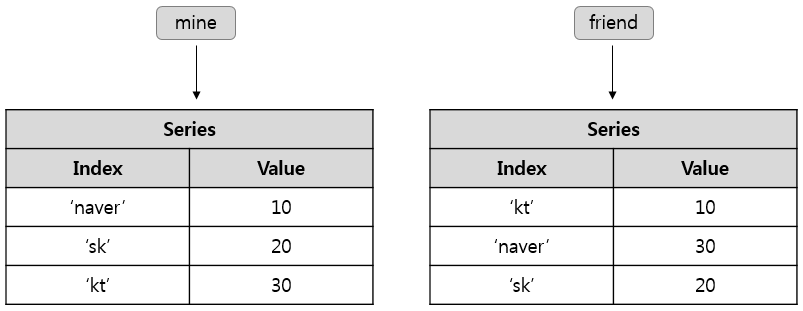

In [ ]:
merge = mine + friend
merge

#### - 사전형을 대체하여 사용 가능하다.

#### - 파이썬 사전 객체로부터 Series 객체 생성 가능

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states) # pd.Series 가능
obj4 ####5

In [ ]:
obj3 + obj4

#### - isnull / notnull 함수를 통해 누락된 데이터를 찾을 수 있다.

In [ ]:
pd.isnull(obj4)

In [ ]:
pd.notnull(obj4)

#### - 객체와 색인 모두 name 속성이 있다. (대입을 통해 변경 가능하다.)

In [ ]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

### DataFrame

#### - 로우와 칼럼으로 구성된 2차원 형태의 자료 구조

#### 파일을 DataFrame으로 불러오기

df = pd.read_csv('파일명.확장자')

#### DataFrame 생성

* #### Python의 Dictionary 사용
* #### Dictionary를 통해 데이터를 저장 후 DataFrame 클래스의 생성자 인자로 넘겨준다.

In [ ]:
bitamin3 = {'col0': [1, 2, 3, 4],
            'col1': [10, 20, 30, 40],
            'col2': [100, 200, 300, 400]}

data = DataFrame(bitamin3)
data

In [ ]:
DataFrame(bitamin3, columns=['col1', 'col2', 'col0'])

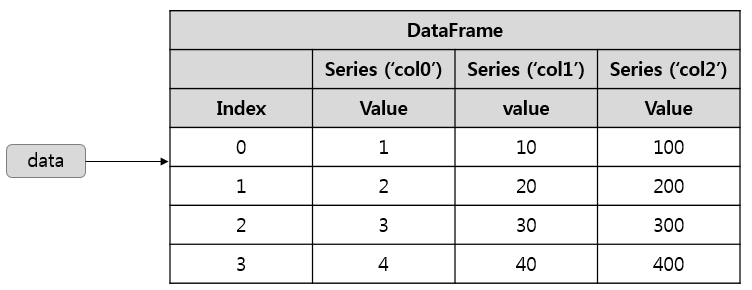
####6

#### - DataFrame 객체 생성 시 칼럼의 순서를 지정할 수 있다.

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = DataFrame(data)
frame

In [ ]:
DataFrame(data, columns=['year', 'state', 'pop'])

#### 2) DataFrame 칼럼, 로우 선택

- #### 사전 형식의 표기법, 속성 형식으로 접근 가능하다.

In [ ]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

In [ ]:
frame2.columns

In [ ]:
frame2['state']

In [ ]:
frame2.year ####7

- #### 칼럼은 대입이 가능하다.

In [ ]:
frame2['debt'] = 16.5
frame2
frame2['debt'] = np.arange(6.) ####8 numpy.arange([start, ] stop, [step, ] dtype=None)
frame2

- #### List나 배열을 칼럼에 대입할 때는 값의 길이가 DataFrame의 크기와 같아야 한다.

- #### 반면에 Series를 대입하면 색인에 따라 값이 대입 / 없는 색인에는 값이 X

- #### del 예약어를 통해 칼럼을 삭제할 수 있다.

In [ ]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

In [ ]:
del frame2['eastern']
frame2.columns

- #### 중첩된 사전 ; 바깥 키 값 column / 내부 키 row

In [ ]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [ ]:
frame3 = DataFrame(pop)
frame3

In [ ]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

In [ ]:
frame3.values

### Index Objects

* #### row, column에 대한 이름, 다른 메타데이터 저장
* #### 색인 객체는 변경 불가능하다.

* #### 주요 메서드
메서드 내용은 대체로 비슷한 듯 함. pandas 객체는...

Index.append
추가적인 Index 객체를 덧붙여 새로운 색인 반환

Index.diff
색인의 차집합을 반환

Index.intersection
색인의 교집합을 반환

Index.union
색인의 합집합을 반환

Index.isin
넘겨 받은 값이 해당 색인 위치에 존재하는지 알려주는 불리언 배열을 반환

Index.delete
i 위치의 색인이 삭제된 새로운 색인을 반환

Index.drop
넘겨받은 값이 삭제된 새로운 색인을 반환

Index.insert
i 위치에 값이 추가된 새로운 색인을 반환

Index.is_monotonic
색인이 단조성을 가진다면 True를 반환

Index.is_unique
중복되는 색인이 없다면 True를 반환

Index.unique
색인에서 유일한 값만을 반환

5.2 핵심기능
-------------------

### reindex

Series.reindex( [index list ] , fill_ value = value)

데이터를 새로운 색인에 맞게 재배열, 없는 색인 값이 있다면 비어있는 값을 새로 추가

In [ ]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

In [ ]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

method 옵션을 사용하면 시계열 데이터를 재색인할 때 값을 채워넣을 수 있음

reindex method 옵션
 - ffill 또는 pad : 앞의 값으로 채워 넣음
 - bfill 또는 backfill : 뒤의 값으로 채워 넣음

In [ ]:
bitamin5 = Series(['a','b','c'], index=[0,2,4])
obj

In [ ]:
bitamin5.reindex(range(6), method='ffill')

#### reindex를 통해 index, column 모두 변경 가능하다. 순서만 전달하면 재색인된다.

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

#### columns을 사용해서 reindex 가능

- df.reindex(columns = ['a','b','c'] )

In [ ]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

#### 재색인 함수 인자

- index : 색인으로 사용할 새로운 순서. 순차적인 자료구조 사용가능(list, array...)

- method

- fill_value : 재색인 과정 중 발생하는 비어있는 데이터를 채우기 위한 값

- level : MultiIndex 단계에 단순 색인을 맞춤

- copy : True인 경우 새로운색인이 이전과 색인이 같더라도 데이터를 복사. False라면 두 색인이 같을 경우 데이터 복사 안됨

### 하나의 행 또는 열 삭제

DataFrame.drop( list , axis=0/1)

drop하고자 하는 행의 색인, 열의 이름을 값이나 리스트로 입력하며
axis =1 일 경우 열을 drop하는 것으로 함 default는 행(0)임

In [ ]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

In [ ]:
new_obj = obj.drop('c')
new_obj

In [ ]:
obj.drop(['d', 'c'])

In [ ]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data.drop('two', axis=1) # 열을 삭제한 것

In [ ]:
data.drop(['Ohio', 'Colorado'], axis='rows') # axis - 숫자, 문자로 모두 표현 가능

### Indexing, Slicing, Conditioning

- Series의 색인은 NumPy 배열의 색인과 유사하게 동작하는데, Series의 색인은 정수가 아니어도 된다는 점이 다름

In [ ]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

In [ ]:
obj[[1,3]]

In [ ]:
obj[obj<3]

In [ ]:
obj['b']

- 라벨 이름으로 슬라이싱하는 것은 시작점과 끝점을 포함한다는 점에서 파이썬 슬라이싱과 다름

In [ ]:
obj[1:3]= 5 ####9
obj

In [ ]:
obj['b':'d'] = 5
obj

열은 list를 넣음으로써 색인방식( [ ] )으로 선택하기가 가능하고 행은 일반적인 슬라이싱( : )으로 선택하기로도 가능함. 불리언 배열로 컬럼을 선택할 수도 있음

data[data['age'] > 10]

#### DataFrame.ix[ rows , columns ]

축의 라벨을 사용해서 데이터프레임의 행과 열을 선택할 수 있음

In [ ]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data.ix[data.three>6] 

#### 파이썬 pandas DataFrame의 iloc, loc, ix의 차이
pandas DataFrame에서 index를 통해 해당하는 row를 찾을 때 사용하는 .iloc, .loc, .ix는 겉보기에 다르지 않지만 각각의 용도가 다르다고 한다.

- .iloc

integer positon를 통해 값을 찾을 수 있다. label로는 찾을 수 없다
- .loc

label 을 통해 값을 찾을 수 있다. integer position로는 찾을 수 없다.
- .ix

integer position과 label모두 사용 할 수 있다. 만약 label이 숫자라면 label-based index만 된다.


In [ ]:
s = Series(np.nan, index=[49,48,47,46,45, 1, 2, 3, 4, 5]) ####10
s

In [ ]:
s.iloc[:3]

In [ ]:
s.loc[:3]

In [ ]:
s.ix[:3]

In [ ]:
s2 = Series(np.nan, index=['a','b','c','d','e', 1, 2, 3, 4, 5])
s2

In [ ]:
s2.ix[:6]

In [ ]:
df = DataFrame(np.arange(25).reshape(5,5), 
                      index=list('abcde'),
                      columns=['x','y','z', 8, 9])
df

In [ ]:
df.ix[:'c', :4]

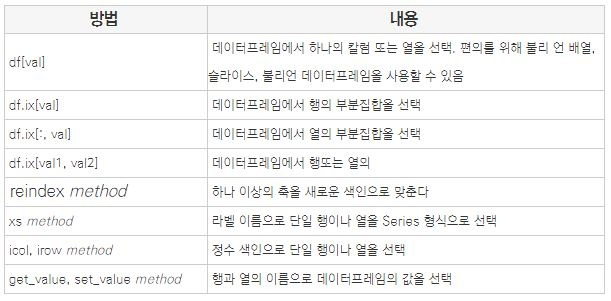

### 산술연산, 데이터 정렬

#### 색인이 다른 두 객체간의 산술연산이 가능

#### SeriesA + SeriesB

- 겹치는 색인이 없을 때는 데이터는 NA 값이 됨

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df1

In [ ]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df2

In [ ]:
df1 + df2

In [ ]:
df1 = pd.DataFrame({'A': [1, 2]})
df1

In [ ]:
df2 = pd.DataFrame({'B': [3, 4]})
df2

In [ ]:
df1 - df2

- 겹치는 색인이 없을 때 NA 값이 아니라 그대로 있는 값만 반환하고 싶다면, fill_value 파라미터에 값을 0으로 주면 된다

df1.add(df2, fill_value=0)

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df1

In [ ]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2

In [ ]:
df1+df2

In [ ]:
df1.add(df2, fill_value=0)

In [ ]:
df1.add(df2, fill_value=2)

add 덧셈(+) 

sub 뺄셈(-) 

div 나눗셈(/) 

mul 곱셈(*) 

- 데이터프레임과 시리즈 간의 연산도 가능

In [ ]:
frame = DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

frame

In [ ]:
series = frame.iloc[0]
series

In [ ]:
frame - series

In [ ]:
series2 = Series(range(3), index=['b', 'e', 'f'])
series2

In [ ]:
frame + series2

In [ ]:
frame.add(series2) #fill_value 왜 안 됨?

In [ ]:
series3 = frame['d']
series3

In [ ]:
frame.sub(series3, axis='index') #axis = 0도 가능

### 함수 적용, 매핑

#### NumPy의 유니버설 함수(배열의 각 원소에 적용되는 메서드) 적용이 가능하다

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

In [ ]:
np.abs(frame)

In [ ]:
f = lambda x: x.max() - x.min()
frame.apply(f)

In [ ]:
frame.apply(f, axis=1)

In [ ]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

In [ ]:
def f(x):
    return Series([x.mean(), x.sum()], index=['mean','sign'])
frame.apply(f)

In [ ]:
#예제1. apply 함수를 이용하여 연월일 정보와 연도를 칼럼으로 하는 데이터프레임을 생성하시오.
date_list = [{'yyyy-mm-dd': '2000-06-27'},
         {'yyyy-mm-dd': '2002-09-24'},
         {'yyyy-mm-dd': '2005-12-20'}]

In [ ]:
#예제2. apply 함수를 이용하여 age라는 칼럼을 추가하시오 / age = current year - year

### 정렬, 순위

#### df.sort_index()

In [ ]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index() #인덱스 정렬

In [ ]:
frame.sort_index(axis =1) #열 정렬???

#### df.sort_values( by=col_list )
- 시리즈를 정렬할 때는 전달인자가 필요 없음
- 데이터 프레임에서는 정렬 기준이 되는 열의 이름이나 열 리스트를 전달
- 열 리스트를 전달할 때는 정렬 우선순위에 따라 리스트를 전달해야 함

In [ ]:
obj = Series([4, 7, -3, 2])
obj.sort_values() # 객체를 값에 따라 정렬

In [ ]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values() #비어있는 값은 가장 마지막에 위치

In [ ]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

In [ ]:
frame.sort_values(by='b') #열 b를 중심ㅇ로 정렬

In [ ]:
frame.sort_values(by=['a', 'b'])

### 중복 색인

- 중복되는 색인 값이 있으면 Series 객체 반환
- 중복되는 색인 값이 없으면 스칼라 값 반환

In [ ]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

In [ ]:
obj['a']


In [ ]:
obj['c']

In [ ]:
#3 위 자료를 사용하여 최근 10명의 대통령의 취임 시 나이와 지지율을 열로 하는 데이터프레임을 만드시오.
df = pd.read_excel('http://qrc.depaul.edu/Excel_Files/Presidents.xls')